In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import stats
import seaborn as sns

In [2]:
db=pd.read_excel('OR_3_4.xlsx')

min_data_sample = 7
max_data_sample = 200
min_quantum = 4
max_quantum = 24
step = 0.02

In [3]:
db_2_analyse = db[(db >= min_data_sample) & (db < max_data_sample)]
df=db_2_analyse.dropna()

In [4]:
quanta_arr = np.arange(min_quantum, max_quantum + step, step)
quanta = pd.DataFrame({'Quanta_val': quanta_arr})

**CQA**

In [5]:
reminder = pd.DataFrame()
cosine_results = pd.DataFrame()
phi_q_df = pd.DataFrame()
sample_size = df.count()
coeff = 2 / sample_size
sample_coefficient = np.sqrt(coeff).iloc[0]


reminder = pd.concat([df.iloc[:, 0] % q for q in quanta_arr], axis=1)
reminder.columns = [round(q, 2) for q in quanta_arr]
cosine_results = pd.concat([(2 * math.pi * df.iloc[:, 0]) / q for q in quanta_arr], axis=1)
cosine_results.columns = [f'Results {round(q, 2)}' for q in quanta_arr]
cosine_results = np.cos(cosine_results)



cosine_sum_series = cosine_results.sum(axis=0)
cosine_sum = cosine_sum_series.to_frame()

phi_q_df = cosine_sum.multiply(sample_coefficient)
phi_q_df.columns = ['Phi_q_values']
phi_q_df['quanta'] = quanta_arr

print(phi_q_df)


               Phi_q_values  quanta
Results 4.0        3.136800    4.00
Results 4.02       2.728424    4.02
Results 4.04       2.459730    4.04
Results 4.06       2.406665    4.06
Results 4.08       2.046590    4.08
...                     ...     ...
Results 23.92    -11.025066   23.92
Results 23.94    -11.029197   23.94
Results 23.96    -11.033863   23.96
Results 23.98    -11.039057   23.98
Results 24.0     -11.044774   24.00

[1001 rows x 2 columns]


In [6]:
max_value = phi_q_df['Phi_q_values'].max()
quantum_max = phi_q_df.loc[phi_q_df['Phi_q_values'].idxmax(), 'quanta']
print(f"Highest 'Phi_q_values': {max_value}")
print(f"Corrisponde al quantum: {quantum_max}")

Highest 'Phi_q_values': 7.595576115477482
Corrisponde al quantum: 9.939999999999873


**Montecarlo**

In [7]:
mc_parameter = 0.15
mc_iterations = 100
df_copy=df

def apply_variation(df_copy, mc_parameter):
    percent_diff = df_copy * mc_parameter
    random_matrix = np.random.uniform(-1, 1, size=df_copy.shape)
    variations = random_matrix * percent_diff
    return df_copy + variations

final_mc_df = pd.DataFrame()
intermediate_dfs = []

for i in range(mc_iterations):
    df_copy = df.copy()
    mc_df = apply_variation(df_copy, mc_parameter)
    intermediate_dfs.append(mc_df[df.columns[0]]) 
    
final_mc_df = pd.concat(intermediate_dfs, axis=1)
final_mc_df.columns = [f'MC_{i+1}' for i in range(mc_iterations)]


print(final_mc_df)

            MC_1        MC_2        MC_3        MC_4        MC_5        MC_6  \
0     175.832492  192.964105  189.182250  178.288329  179.343668  190.760264   
3     142.211287  113.829803  111.412405  132.749363  119.476443  107.479316   
4     167.034594  159.648592  211.379000  165.240668  158.455460  166.668996   
5      52.871022   58.248392   57.014388   60.072186   52.527687   52.895950   
6      23.298507   22.408176   20.146750   19.841033   19.772726   18.742751   
...          ...         ...         ...         ...         ...         ...   
4047   10.586039    8.884251   10.467149    8.782426    9.654828   10.246327   
4061    7.484779    7.908908    7.477253    6.754494    8.519277    8.236208   
4063    6.852790    7.096688    7.355952    6.964764    8.994965    6.921171   
4064    8.474700    7.718687    6.984407    8.305164    7.202358    7.286117   
4075    9.547608   11.920902   11.893652    9.196311    9.895699    9.472419   

            MC_7        MC_8        MC_

In [8]:
Montecarlo_phi_q = pd.DataFrame()

def calculate_Phi_q_values_mc(df, quanta_arr):
    Phi_q_values_mc_list = []
    
    for q in quanta_arr:
        reminder_mc = df.iloc[:, 0] % q
        cosine_result_mc = np.cos((2 * math.pi * df.iloc[:, 0]) / q)
        Phi_q_values_mc = np.sum(cosine_result_mc) * sample_coefficient
        Phi_q_values_mc_list.append(Phi_q_values_mc)
        
    return Phi_q_values_mc_list

Montecarlo_phi_q_values = []
completed_cols = 0

for col in final_mc_df.columns:
    df = final_mc_df[[col]]  
    Phi_q_values_mc_list = calculate_Phi_q_values_mc(df, quanta_arr)
    Montecarlo_phi_q_values.append(Phi_q_values_mc_list)
    
    completed_cols += 1
    print(f"Column {completed_cols}/{mc_iterations} completed.")


Montecarlo_phi_q = pd.DataFrame(Montecarlo_phi_q_values, columns=quanta_arr).T

print(Montecarlo_phi_q)

Column 1/100 completed.
Column 2/100 completed.
Column 3/100 completed.
Column 4/100 completed.
Column 5/100 completed.
Column 6/100 completed.
Column 7/100 completed.
Column 8/100 completed.
Column 9/100 completed.
Column 10/100 completed.
Column 11/100 completed.
Column 12/100 completed.
Column 13/100 completed.
Column 14/100 completed.
Column 15/100 completed.
Column 16/100 completed.
Column 17/100 completed.
Column 18/100 completed.
Column 19/100 completed.
Column 20/100 completed.
Column 21/100 completed.
Column 22/100 completed.
Column 23/100 completed.
Column 24/100 completed.
Column 25/100 completed.
Column 26/100 completed.
Column 27/100 completed.
Column 28/100 completed.
Column 29/100 completed.
Column 30/100 completed.
Column 31/100 completed.
Column 32/100 completed.
Column 33/100 completed.
Column 34/100 completed.
Column 35/100 completed.
Column 36/100 completed.
Column 37/100 completed.
Column 38/100 completed.
Column 39/100 completed.
Column 40/100 completed.
Column 41

In [9]:
alpha_1_share = round(mc_iterations * 0.01)
alpha_5_share = round(mc_iterations * 0.05)
mc_max_column = Montecarlo_phi_q.max()
alpha_1 = mc_max_column.nlargest(alpha_1_share).iloc[-1]
alpha_5 = mc_max_column.nlargest(alpha_5_share).iloc[-1]

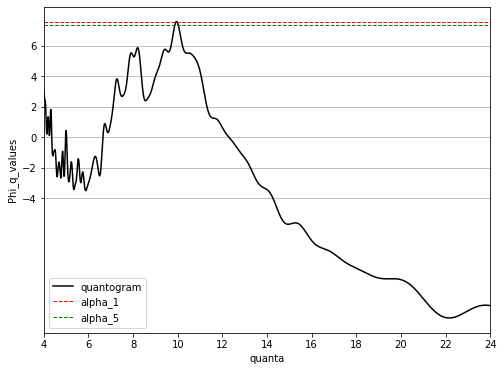

In [10]:
fig, axes = plt.subplots(figsize=(8, 6))

sns.lineplot(data=phi_q_df, x=phi_q_df['quanta'], y=phi_q_df['Phi_q_values'], color='black', label='quantogram')
plt.axhline(y=alpha_1, color='r', linestyle='--', label='alpha_1', linewidth=1)
plt.axhline(y=alpha_5, color='g', linestyle='--', label='alpha_5', linewidth=1)
plt.xlim(quanta_arr[0], quanta_arr[-1])
plt.xticks([4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])
plt.yticks([-4, -2, 0, 2, 4, 6])

plt.legend()
plt.grid(axis='y')

plt.show()

In [11]:
alpha_5_share

5